### <p style="text-align: right;"> &#9989; **Context Matters** </p>
#### <p style="text-align: right;"> &#9989; Christina, Hao, Yunfei, Erik</p>

# Module 3

## How do gene transcription relate to phenotype?

We will work with maize.

First, import the usual libraries
- `math`: basic math operations
- `os`: enable file manipulation with the OS
- `sys`: enable interaction with commandline
- `importlib` : reload libraries if necessary
- `argparse` : pass arguments directly to the command line
- `glob`: more variable manipulation
- `matplotlib.pyplot`: default plotter (I personally like ggplot waaaaay better. E)
    - `inline`: so that plots are shown in the notebook
- `numpy`: all number cruching done here
- `pandas`: data wrangling

In [79]:
import math
import importlib
import numpy as np
import os
import sys
import argparse
import glob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

Functions to compute gene-gene correlation. More details below.

In [2]:
def fpkm2tpm(fpkm, skip=0):
    """ Converts FPKM values to TPM values. TPM values allow better
    comparison of gene expression between individuals.

    Parameters
    ----------
    fpkm : data frame
        Data frame containing gene expression values.
        Rows must be genes while columns are different individuals

    skip : scalar
        Number of metadata columns to skip from the beginning of the dataframe

    Returns
    -------
    tpm : data frame
        A copy of the original dataframe with TPM values in place
    """

    total_exp = fpkm.iloc[:, skip:].sum(axis='index')
    tpm = fpkm.iloc[:, skip:]*1e6
    tpm = tpm.div(other=total_exp, axis='columns')

    return tpm

In [3]:
def gene_correlation(df, cutoff=100, method='pearson'):
    """ Given a dataframe of gene expression (FPKM or TPM values), compute the
    variance of expression and select only those genes whose expression
    variance is larger than a fixed cutoff.
    
    A gene x gene correlation matrix of this subset is computed later
    according to the specified method
    """
    var = df.var(axis = 'columns')
    expressed = df[var > cutoff].T
    corr = expressed.corr(method=corr_meth)
    
    return corr

In [4]:
def plot_corr(dst, corr, corr_meth='pearson', var_cutoff=100):
    """ Plots and saves a heatmap corresponding to a correlation matrix """

    fig, axes = plt.subplots(figsize=(8, 6))

    im = axes.imshow(corr)
    axes.set_title('Gene correlation [' + corr_meth + ']')

    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    plt.savefig(dst + corr_meth + '_-_cutoff_' + str(round(var_cutoff)) + '.jpg', dpi=150, optimize=True, format='jpg')

Specify the gene expression raw data file and a directory to save plots and CSVs.

In [5]:
# path to FPKM data
gene_file = '~/documents/css893/942_FPKM_B73_genes_w_feature.txt'

# path to correlation matrix directory
src = '/home/ejam/documents/css893/tpm_corr/'

# path to save results
dst = '/home/ejam/documents/css893/context_matters/results/'


Read the FPKM data. We observe that its first 5 columns are metadata regarding the genes. We specify then `metadata_cols = 5`. 

Later we convert FPKM into TPM, which allows better sample-to-sample comparison.

Finally, append an additional column with the **variance** of gene expression.

In [132]:
fpkm = pd.read_table(gene_file)
metadata_cols = 5

/home/ejam/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
gene_info = fpkm.iloc[:, :metadata_cols]
foo = gene_info['chromosome'].unique()
foo

array(['8', '10', '2', '6', '1', '5', '7', '4', '9', '3', 'B73V4_ctg56',
       'B73V4_ctg10', 'B73V4_ctg31', 'B73V4_ctg193', 'B73V4_ctg182',
       'B73V4_ctg20', 'B73V4_ctg51', 'B73V4_ctg6', 'B73V4_ctg150',
       'B73V4_ctg181', 'B73V4_ctg134', 'B73V4_ctg58', 'B73V4_ctg208',
       'B73V4_ctg98', 'B73V4_ctg91', 'B73V4_ctg178', 'B73V4_ctg53',
       'B73V4_ctg61', 'B73V4_ctg12', 'B73V4_ctg250', 'B73V4_ctg107',
       'B73V4_ctg189', 'B73V4_ctg147', 'B73V4_ctg28', 'B73V4_ctg75',
       'B73V4_ctg129', 'B73V4_ctg133', 'B73V4_ctg68', 'B73V4_ctg44',
       'B73V4_ctg142', 'B73V4_ctg104', 'B73V4_ctg141', 'B73V4_ctg245',
       'B73V4_ctg11', 'B73V4_ctg88', 'B73V4_ctg41', 'B73V4_ctg52',
       'B73V4_ctg65', 'B73V4_ctg190', 'B73V4_ctg188', 'B73V4_ctg42',
       'B73V4_ctg151', 'B73V4_ctg173', 'B73V4_ctg92', 'B73V4_ctg50',
       'B73V4_ctg54', 'B73V4_ctg35', 'B73V4_ctg14', 'B73V4_ctg110',
       'B73V4_ctg49', 'B73V4_ctg120', 'B73V4_ctg105', 'B73V4_ctg95',
       'B73V4_ctg205', 'B73V4_ctg

In [134]:
for idx in foo:
    if idx == str(idx):
        value = 0
        if idx[0] == 'B':
            value = int('73' + (idx.split('_')[-1])[3:])
            value = 11
        else:
            value = int(idx)
        
        mask = gene_info.chromosome == idx
        gene_info.loc[mask, 'chromosome'] = value

In [7]:
tpm = fpkm2tpm(fpkm, skip=metadata_cols)

In [8]:
fpkm['var'] = fpkm[fpkm.columns[metadata_cols:]].var(axis='columns')
fpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
0,Zm00001d012719,8,gene,179164454,179168169,5.825000,4.845710,6.323400,6.999010,6.661100,...,12.870700,8.81507,13.77870,8.31790,12.78320,4.94950,9.39900,10.41090,15.840500,8.863634
1,Zm00001d024742,10,gene,85863323,85863746,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.002510
2,Zm00001d007137,2,tRNA_gene,223153553,223153627,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000
3,Zm00001d025653,10,gene,125107973,125113328,9.350780,9.954800,7.735490,10.360900,9.072890,...,3.870230,5.27849,5.17829,3.80291,6.44675,5.61858,3.98055,4.17545,4.500850,7.309110
4,Zm00001d036003,6,gene,65322472,65323171,8.955580,0.333921,5.445820,0.332438,1.232330,...,0.721774,2.95424,8.44716,12.33680,1.19629,1.71452,7.01768,11.75760,0.793672,23.779891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44254,Zm00001d028653,1,gene,41833737,41838204,368.777000,301.349000,412.319000,310.820000,278.737000,...,186.552000,147.63300,165.60800,147.58300,244.82100,171.15400,219.07400,147.01700,165.612000,5386.660448
44255,Zm00001d009511,8,gene,68418436,68421217,6.003590,5.297160,10.421700,6.304130,4.856300,...,4.670860,3.47752,4.92093,6.26904,4.95873,7.25625,5.66864,4.28185,5.765310,2.862434
44256,Zm00001d032828,1,gene,239455289,239464371,151.479000,46.479600,65.075600,70.169900,59.555600,...,102.226000,100.29500,64.90400,91.17440,101.80300,108.58200,63.72140,95.96760,56.404900,683.058288
44257,Zm00001d002031,2,gene,4673452,4674247,0.237774,0.386886,0.179111,0.415566,0.192793,...,0.000000,0.00000,0.00000,0.00000,1.51552,0.00000,0.00000,0.00000,2.555730,0.549950


In [9]:
tpm['var'] = tpm.var(axis='columns')
tpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
0,7.505675,7.413637,8.541971,9.729222,9.476356,6.597887,12.537896,9.163717,9.414227,9.318751,...,15.380075,10.333293,17.149343,9.535212,15.772613,5.897109,11.189223,12.855592,19.043949,12.110588
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003516
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12.048740,15.230230,10.449495,14.402536,12.907468,16.220867,10.695777,11.943059,17.207057,12.803981,...,4.624801,6.187607,6.445040,4.359460,7.954354,6.694289,4.738724,5.155931,5.411064,18.378537
4,11.539514,0.510879,7.356491,0.462117,1.753164,3.415752,0.267896,0.000000,2.694784,5.859557,...,0.862497,3.463050,10.513564,14.142271,1.476048,2.042774,8.354334,14.518525,0.954178,44.352302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44254,475.179428,461.045369,556.981540,432.066341,396.542762,501.192740,378.089810,382.814842,551.009013,492.466985,...,222.923673,173.059898,206.120203,169.181541,302.073579,203.922392,260.800930,181.539597,199.103968,13946.496957
44255,7.735793,8.104328,14.078164,8.763279,6.908773,11.738333,9.542995,12.750559,9.998663,13.071422,...,5.581528,4.076455,6.124723,7.186504,6.118353,8.645500,6.748343,5.287316,6.931237,7.229097
44256,195.184907,71.110919,87.907440,97.542153,84.726255,67.742300,86.893812,66.862579,132.809102,66.093026,...,122.156800,117.568853,80.781276,104.517630,125.610125,129.370632,75.858388,118.502754,67.811749,1035.842118
44257,0.306378,0.591912,0.241952,0.577672,0.274275,0.685530,0.000000,0.916160,0.671971,0.275734,...,0.000000,0.000000,0.000000,0.000000,1.869932,0.000000,0.000000,0.000000,3.072579,0.846049


Visualize the distribution of variance of gene expression. 

Taking logarithms makes the plot clearer. 

Ideally, we would cut around $e^{-20} \approx 2.1\times10^{-9}$. That leaves us with 40,000 genes, which is a lot.

For practical purposes, we'll get more aggressive with the cutoff values. Once we have the whole pipeline going, we can take larger subsets of genes and work with HPCC.

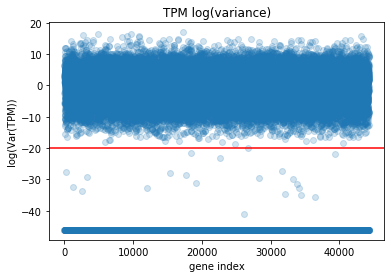

In [21]:
var_cutoff = math.e**-20
expressed = tpm[tpm['var'] > var_cutoff]

plt.title('TPM log(variance)')
plt.xlabel('gene index')
plt.ylabel('log(Var(TPM))')
plt.axhline(math.log(var_cutoff), c='r')
plt.scatter(range(tpm.shape[0]), np.log(tpm['var']+1e-20), alpha=0.2)
plt.savefig(dst + 'gene_expression_variance.jpg', dpi=150, optimize=True, format='jpg')

Taking `cutoff = 100` gives us a nicer subset of 7400 genes. This is still quite large.

The dataframe must be transposed to compute gene-gene correlation. Else, we would compute cultivar-cultivar correlation.

In [11]:
var_cutoff = 100 # log(100) = 4.6
expressed = tpm[tpm['var'] > var_cutoff].drop(columns=['var']).T
expressed

,7,8,19,20,27,30,33,38,40,49,...,44212,44218,44219,44221,44227,44228,44245,44250,44254,44256
LH128,98.100262,63.074984,40.888596,8.557977,71.207012,61.816350,22.370776,34.630989,25.708836,66.591247,...,44.445706,23.764576,195.074094,545.557529,45.691326,55.161490,15.345336,22.301711,475.179428,195.184907
DKMBZA,100.070815,126.683326,44.759415,22.466838,107.140200,35.485541,10.605685,47.320073,27.572089,73.426634,...,3.966319,49.439955,202.810148,396.049001,28.716941,69.809707,11.574182,17.676907,461.045369,71.110919
CQ806,52.017625,80.682008,48.552692,40.616173,98.555253,35.422150,9.485919,41.848014,34.778740,90.710591,...,24.773257,52.770860,227.259070,411.571884,46.399166,81.345682,1.898891,9.297394,556.981540,87.907440
DKF274,72.380634,99.661060,37.223012,4.757762,89.309928,48.327014,15.460947,41.746627,43.172994,101.050450,...,11.748960,47.784324,203.842122,648.207938,34.718912,84.984121,1.218511,7.597567,432.066341,97.542153
Ill.Hy,107.479553,70.665153,44.543325,6.831552,94.639931,58.923525,22.246695,43.316013,26.827316,111.751033,...,16.082533,34.066710,250.268208,544.962658,24.705446,70.924074,0.000000,5.685614,396.542762,84.726255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIL900,29.561188,85.201256,35.987968,4.886250,106.708333,317.787954,51.712461,25.467504,11.899012,163.606686,...,38.686532,33.683744,207.486266,370.751173,32.559332,66.401379,10.130874,270.293179,302.073579,125.610125
Va22,29.387729,60.461725,32.249010,25.044039,109.144124,190.084826,35.258626,29.290030,9.749228,169.794337,...,16.398242,17.581000,287.273051,352.252656,31.860595,78.000309,16.866484,260.532021,203.922392,129.370632
E8501,24.180223,68.120335,27.073778,3.151816,111.972829,214.478569,46.736764,24.496292,8.464012,135.643293,...,42.195361,34.647783,284.051991,346.952832,34.253738,57.398014,1.660860,149.542025,260.800930,75.858388
PHP85,21.942759,52.957003,35.129407,2.381215,123.020839,173.008223,27.726658,24.370046,7.079473,244.589529,...,35.031732,40.081160,371.922978,379.465261,63.551145,65.216795,1.703571,90.177455,181.539597,118.502754


Correlation and later plot the matrix. 

**Warning:** Even with a small subset of 7400 genes, computing the `pearson` correlation takes a while. It also consumes like 1Gb of RAM. The `spearman` method is **much slower** than `pearson`. Unless there's a clear-cut reason to use spearman, we'll stick with pearson.

In [12]:
corr_meth = 'pearson'
corr = expressed.corr(method=corr_meth) # method{‘pearson’, ‘kendall’, ‘spearman’} or callable

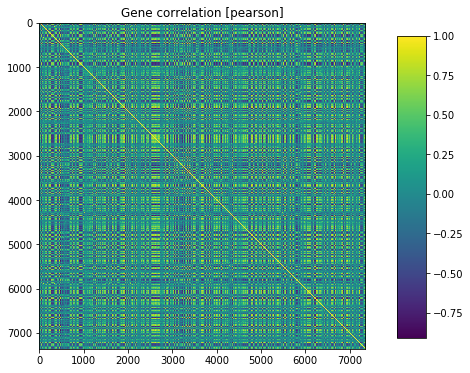

In [13]:
fig, axes = plt.subplots(figsize=(8, 6))

im = axes.imshow(corr)
axes.set_title('Gene correlation [' + corr_meth + ']')

cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig(dst + corr_meth + '_-_cutoff_' + str(var_cutoff) + '.jpg', dpi=150, optimize=True, format='jpg')

Save the correlation matrix

In [14]:
corr.to_csv(dst+corr_meth+'_gene_correlation_'+ str(var_cutoff)+'.csv', index=False)

### Summarizing with functions

The steps described above can be carried out using the functions we defined at the very beginning.

We just need to fix a `cutoff` value regarding expression variance and a correlation `method`. 

Recall that when computing `tpm` above, we created an additional column for the variance. We'll have to drop it.

Increasing the cutoff to 10000, we now have a very manageable subset of 650 genes.

In [15]:
cutoff = 10000
method = 'pearson'
foo = gene_correlation(tpm.iloc[:,:-1], cutoff, method)

In [16]:
foo

,60,74,85,95,114,169,199,415,562,657,...,43720,43830,43873,44001,44033,44111,44119,44155,44221,44254
60,1.000000,-0.203803,-0.041840,0.135602,0.297998,-0.025113,-0.373148,0.335764,-0.295790,0.397197,...,-0.309133,-0.326422,-0.096837,-0.186167,0.136122,-0.417258,0.143673,-0.036973,0.028265,-0.382432
74,-0.203803,1.000000,0.084412,-0.320546,-0.071207,0.101266,0.424646,-0.175569,0.446181,-0.486499,...,0.386614,0.424727,0.153691,0.069929,-0.348278,0.370390,0.104439,-0.068258,0.202899,0.455165
85,-0.041840,0.084412,1.000000,-0.045254,-0.170664,-0.124421,0.323632,-0.062687,0.161443,-0.193569,...,0.360204,0.271762,0.036250,-0.038425,0.057585,0.115981,0.112563,0.080347,0.111763,0.141706
95,0.135602,-0.320546,-0.045254,1.000000,0.097013,0.056162,-0.387976,0.232699,-0.433461,0.467508,...,-0.401847,-0.356511,-0.150706,-0.066169,0.363566,-0.399549,-0.029409,0.056737,-0.233748,-0.494055
114,0.297998,-0.071207,-0.170664,0.097013,1.000000,0.076526,-0.309533,0.360927,-0.220001,0.279083,...,-0.307539,-0.251303,0.034189,-0.165472,-0.075354,-0.314652,0.182568,-0.121469,0.038715,-0.243578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44111,-0.417258,0.370390,0.115981,-0.399549,-0.314652,0.030274,0.669776,-0.405258,0.643508,-0.785690,...,0.605081,0.549997,0.256985,0.361084,-0.449045,1.000000,-0.084839,-0.007476,0.207629,0.803752
44119,0.143673,0.104439,0.112563,-0.029409,0.182568,0.087487,0.010110,0.133939,0.118709,-0.055325,...,0.083770,-0.110514,0.022980,-0.062397,-0.051659,-0.084839,1.000000,-0.097842,0.183584,0.012121
44155,-0.036973,-0.068258,0.080347,0.056737,-0.121469,0.012606,0.072143,-0.181021,-0.051429,0.074363,...,0.234961,0.025535,-0.005260,0.291611,0.384691,-0.007476,-0.097842,1.000000,0.010586,-0.131849
44221,0.028265,0.202899,0.111763,-0.233748,0.038715,0.088365,0.226196,-0.125008,0.300624,-0.298867,...,0.369234,0.205502,0.174752,0.181013,-0.252004,0.207629,0.183584,0.010586,1.000000,0.319675


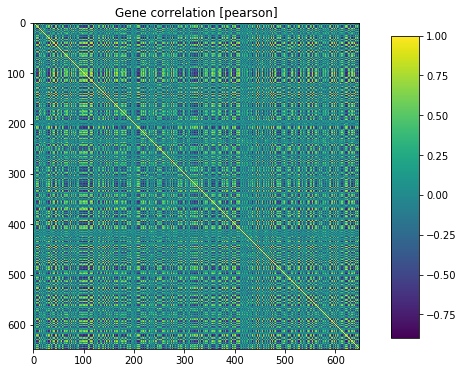

In [17]:
plot_corr(dst, foo, method, cutoff)

In [18]:
foo.to_csv(dst+corr_meth+'_gene_correlation_'+ str(cutoff)+'.csv', index=False)

## Load instead of re-computing the correlations

In [138]:
cutoff = 100
corr_meth = 'pearson'
corr_csv = '{}_gene_correlation_{}.csv'.format(corr_meth,cutoff)

corr = pd.read_csv(src + corr_csv)
corr

,7,8,19,20,27,30,33,38,40,49,...,44212,44218,44219,44221,44227,44228,44245,44250,44254,44256
0,1.000000,0.603307,0.617355,0.067536,-0.152953,-0.580836,-0.638142,0.579787,0.688214,-0.597067,...,-0.495718,0.561550,-0.420209,0.198508,0.301550,0.473162,-0.283920,-0.468367,0.686651,-0.191131
1,0.603307,1.000000,0.737379,0.083168,0.016714,-0.508527,-0.633081,0.682938,0.585571,-0.633340,...,-0.499109,0.627078,-0.332796,0.378169,0.279490,0.657190,-0.368799,-0.403331,0.742548,-0.133403
2,0.617355,0.737379,1.000000,0.149760,-0.043953,-0.636658,-0.691886,0.812817,0.686925,-0.688775,...,-0.535990,0.765954,-0.308007,0.382220,0.363331,0.769484,-0.389583,-0.468688,0.803792,-0.062469
3,0.067536,0.083168,0.149760,1.000000,-0.026165,-0.048954,-0.126808,0.224780,0.059721,-0.075750,...,-0.085676,0.127682,0.022826,0.020554,0.131990,0.037556,-0.132367,0.026499,0.052534,0.197024
4,-0.152953,0.016714,-0.043953,-0.026165,1.000000,0.191237,0.105725,-0.126072,-0.180447,0.100474,...,-0.023838,-0.152780,0.287822,0.201723,-0.134249,0.075790,-0.063227,0.052689,-0.030109,0.114066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,0.473162,0.657190,0.769484,0.037556,0.075790,-0.516658,-0.582472,0.677102,0.580988,-0.595140,...,-0.461170,0.664644,-0.245511,0.377184,0.226978,1.000000,-0.322122,-0.396342,0.678366,-0.111052
7355,-0.283920,-0.368799,-0.389583,-0.132367,-0.063227,0.286439,0.371946,-0.387424,-0.297418,0.385382,...,0.310319,-0.332960,0.091233,-0.218509,-0.210024,-0.322122,1.000000,0.280048,-0.368306,-0.032168
7356,-0.468367,-0.403331,-0.468688,0.026499,0.052689,0.543811,0.491412,-0.438147,-0.429403,0.433600,...,0.429828,-0.438580,0.213846,-0.236870,-0.191679,-0.396342,0.280048,1.000000,-0.461572,0.124425
7357,0.686651,0.742548,0.803792,0.052534,-0.030109,-0.544782,-0.652504,0.729326,0.677659,-0.694226,...,-0.526258,0.657663,-0.404594,0.319675,0.346116,0.678366,-0.368306,-0.461572,1.000000,-0.160224


In [139]:
meta = gene_info.iloc[corr.columns]
foo = meta.chromosome.unique()
print(len(foo), meta.shape)
meta.head(20)

11 (7359, 5)


,gene,chromosome,feature_type,position_left,position_right
7,Zm00001d033979,1,gene,279975978,279978430
8,Zm00001d018479,5,gene,221521585,221525322
19,Zm00001d016606,5,gene,169941759,169949748
20,Zm00001d047989,9,gene,147322756,147334539
27,Zm00001d009640,8,gene,74045694,74049815
30,Zm00001d052950,4,gene,206094010,206095432
33,Zm00001d013504,5,gene,12940432,12941044
38,Zm00001d049223,4,gene,21429670,21450419
40,Zm00001d024939,10,gene,95933121,95935711
49,Zm00001d034007,1,gene,281040470,281042099


In [140]:
lut = dict(zip(foo, cm.get_cmap('viridis', len(foo)).colors))
row_colors = meta['chromosome'].map(lut)
row_colors = row_colors.reset_index(drop=True)

ValueError: The condensed distance matrix must contain only finite values.

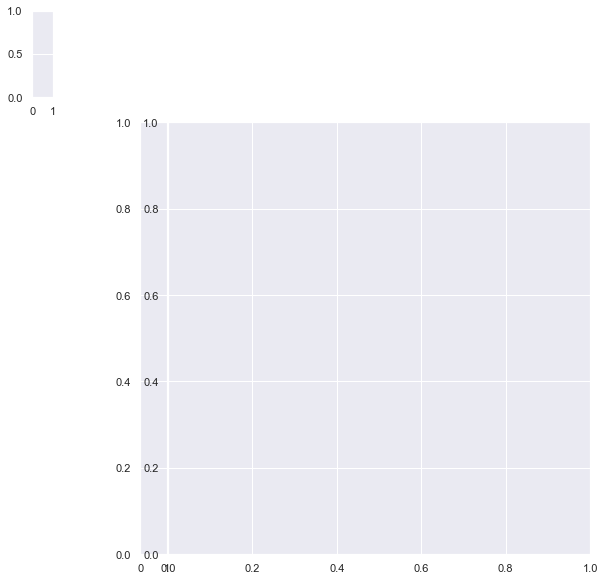

In [141]:
g = sns.clustermap(corr, cmap = 'vlag', row_colors=row_colors)
plt.savefig(dst + corr_meth + '_clustering_-_cutoff_' + str(round(cutoff)) + '.jpg', dpi=200, optimize=True, format='jpg')